In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

C:\Users\snuist\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('../mlearning/ML_data/data.csv', header=0)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
y = data.iloc[:,1]

drop_list = ['id','diagnosis' ]
x = data.drop(drop_list, axis=1)

In [17]:
y = y.map({'M': 1, 'B': 0})

In [43]:
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

## Explore the data

In [41]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


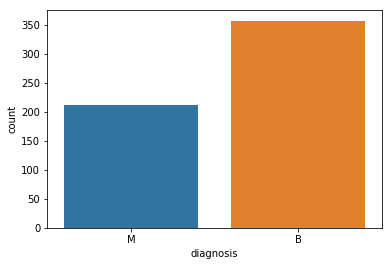

In [25]:
sns.countplot(data.loc[:,'diagnosis'], label='Count')

## A little feature selection

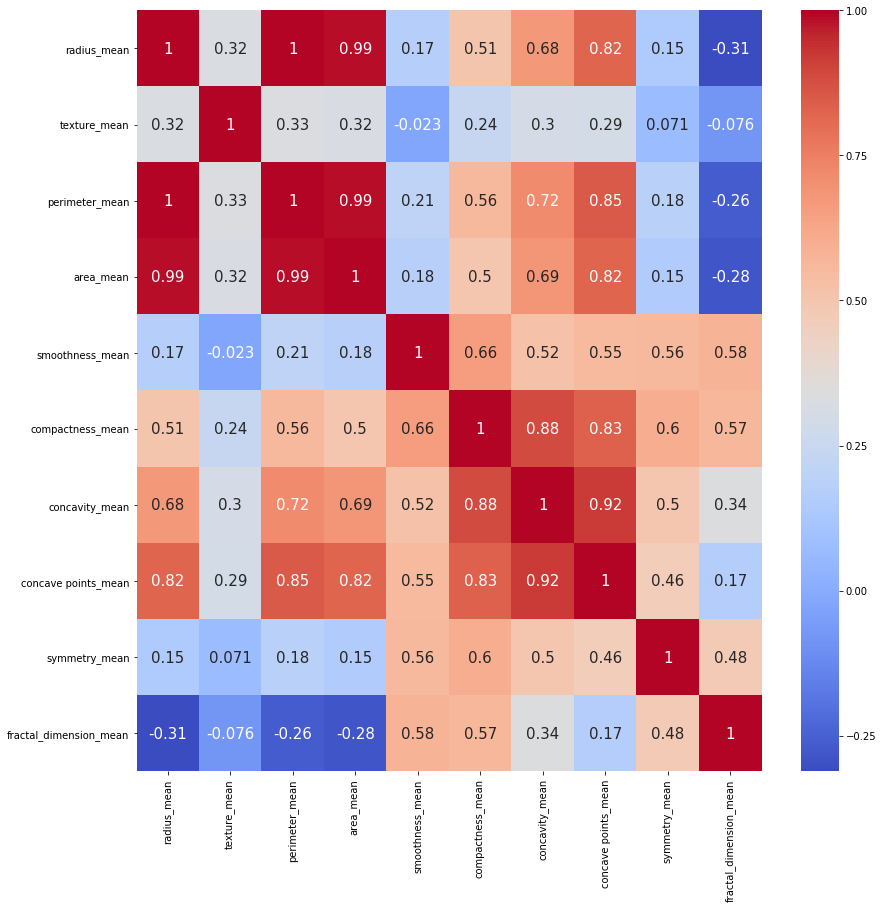

In [44]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size':15},
           xticklabels=features_mean, yticklabels=features_mean,
           cmap='coolwarm')

highly correlated features: # look at the square parts which have red tonality.

1) radius, perimeter, and area
2) compactness, concavity, cacavepoint

In [33]:
prediction_var = ['texture_mean', 'perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

### Before normalizing, let's see how RandomForest works out

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [55]:
clf_rf = RandomForestClassifier(n_estimators=100)

In [56]:
clf_rf.fit(x_train, y_train)
y_hat_rf = clf_rf.predict(x_test)
metrics.accuracy_score(y_hat_rf, y_test)

0.98245614035087714

### how about SVC

In [69]:
clf_svc = svm.SVC()
clf_svc.fit(x_train, y_train)
y_hat_svc = clf_svc.predict(x_test)
metrics.accuracy_score(y_hat_svc, y_test)

0.97660818713450293

############################################################################

### Normalize the features and classify with RandomForest

In [58]:
x_1 = (x-x.mean())/x.std()

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(x_1, y, test_size=0.3, stratify=y, random_state=1921)

In [131]:
clf_rf_2 = RandomForestClassifier(n_estimators=100)
clf_rf_2.fit(X_train, Y_train)
y_hat_rf_2 = clf_rf_2.predict(X_test)
metrics.accuracy_score(y_hat_rf_2, Y_test)

0.97660818713450293

### after normalizing how would SVC change

In [132]:
clf_svc_2 = svm.SVC()
clf_svc_2.fit(X_train, Y_train)
Y_hat_svc = clf_svc.predict(X_test)
metrics.accuracy_score(Y_hat_svc, Y_test)

0.98245614035087714

WOW. Its performance went up and got to the point that parrallels with RandomForest classifier before normalizing

#### Gauging Feature importance

In [133]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, Y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(len(importances)):
    print('%d. feature %d (%f)' % (f+1, indices[f], importances[indices[f]]))

1. feature 27 (0.163454)
2. feature 0 (0.138838)
3. feature 3 (0.128187)
4. feature 20 (0.090773)
5. feature 13 (0.075507)
6. feature 26 (0.074780)
7. feature 6 (0.068214)
8. feature 2 (0.035030)
9. feature 22 (0.034794)
10. feature 23 (0.033511)
11. feature 1 (0.024075)
12. feature 7 (0.021560)
13. feature 10 (0.013328)
14. feature 21 (0.012878)
15. feature 25 (0.012441)
16. feature 11 (0.009598)
17. feature 29 (0.009361)
18. feature 14 (0.008610)
19. feature 28 (0.006544)
20. feature 19 (0.006031)
21. feature 12 (0.005300)
22. feature 4 (0.004340)
23. feature 9 (0.004231)
24. feature 8 (0.004014)
25. feature 16 (0.003577)
26. feature 24 (0.003388)
27. feature 18 (0.002339)
28. feature 15 (0.001813)
29. feature 5 (0.001747)
30. feature 17 (0.001735)


In [134]:
x.columns[indices][:10]

Index(['concave points_worst', 'radius_mean', 'area_mean', 'radius_worst',
       'area_se', 'concavity_worst', 'concavity_mean', 'perimeter_mean',
       'perimeter_worst', 'area_worst'],
      dtype='object')

#### However, should we go for top 10 features? How many would be optimal for the higher prediction power of our model? (Don't use RFECV, cause it is returning overfitted model that just suits training data, not a test data)

In [135]:
from sklearn.feature_selection import RFECV 
rfecv = RFECV(estimator=clf_rf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, Y_train)

print('Optimal number of features: ', rfecv.n_features_)
print('Best features: ', X_train.columns[rfecv.support_])

Optimal number of features:  16
Best features:  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


#### Let's just use Tree based feature selection

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf_etc = ExtraTreesClassifier()
clf_etc = clf_etc.fit(X_train, Y_train)
clf_etc.feature_importances_

array([ 0.10692083,  0.0178529 ,  0.02130791,  0.06667703,  0.00990793,
        0.01518307,  0.06947155,  0.03660159,  0.00569839,  0.00541745,
        0.0527663 ,  0.0034034 ,  0.03937325,  0.03401185,  0.00604158,
        0.00571497,  0.01306757,  0.00864382,  0.00446821,  0.00794947,
        0.09209064,  0.01954962,  0.11476832,  0.08345305,  0.02490048,
        0.01219917,  0.04302099,  0.05748653,  0.01354548,  0.00850665])

In [87]:
X_train.shape

(398, 30)

In [89]:
model = SelectFromModel(clf_etc, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [110]:
# RandomForest, ExtraTrees에만 쓸 수 있음.
from sklearn.feature_selection import SelectFromModel

def sorted_features_list(fitted_classifier, X): 
    # get importance value
    importances = fitted_classifier.feature_importances_
    # sort importance value and get index (descending)
    indices = np.argsort(importances)[::-1]
    # select optimum features 
    model = SelectFromModel(fitted_classifier, prefit=True)
    X_new = model.transform(X)
    Boolean_as_mask = model.get_support()
    sorted_importance = Boolean_as_mask[indices]
    
    # printing the variable sorted by its importance & return selected features list
    selected_features = []
    for imp_rank, var_name in enumerate(X_train.columns[indices]):
        if sorted_importance[imp_rank] == True:
            selected_features.append(var_name)
            print('%d. %s (%f)' % (imp_rank+1, var_name, importances[indices[imp_rank]]))
        else:
            continue
    
    return selected_features

In [90]:
X_train_new.shape

(398, 12)

In [136]:
sorted_list_0 = sorted_features_list(clf_etc, X_train) # default인 ExtraTreesClassifier 쓸 때

1. perimeter_worst (0.114768)
2. radius_mean (0.106921)
3. radius_worst (0.092091)
4. area_worst (0.083453)
5. concavity_mean (0.069472)
6. area_mean (0.066677)
7. concave points_worst (0.057487)
8. radius_se (0.052766)
9. concavity_worst (0.043021)
10. perimeter_se (0.039373)
11. concave points_mean (0.036602)
12. area_se (0.034012)


In [137]:
sorted_list_1 = sorted_features_list(clf_rf, X_train) # default인 RandomForestClassifier 쓸 때

1. area_worst (0.195697)
2. radius_worst (0.105943)
3. concave points_mean (0.097194)
4. perimeter_worst (0.093117)
5. perimeter_mean (0.082405)
6. concave points_worst (0.070980)
7. concavity_mean (0.070543)
8. area_mean (0.037931)
9. area_se (0.034261)


In [140]:
# Predicting with selected features (using ExtraTreesClassifier)
clf_etc_S = ExtraTreesClassifier()
clf_etc_S = clf_etc_S.fit(X_train[sorted_list_0], Y_train)
clf_etc_S.score(X_test[sorted_list_0],Y_test)

0.94736842105263153

In [141]:
# Predicting with selected features (using RandomForestClassifier)
clf_etc_S = ExtraTreesClassifier()
clf_etc_S = clf_etc_S.fit(X_train[sorted_list_1], Y_train)
clf_etc_S.score(X_test[sorted_list_1],Y_test)

0.94736842105263153

In [122]:
# Predicting with all features
clf_etc_S = ExtraTreesClassifier()
clf_etc_S = clf_etc_S.fit(X_train, Y_train)
clf_etc_S.score(X_test,Y_test)

0.94152046783625731